<a href="https://colab.research.google.com/github/Rubi24-S/rubishabong/blob/main/plantdiseaseproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Step 2: Data Preparation
# Define paths
train_data_dir = '/content/drive/MyDrive/Crop_Disease_Detection_Project/Dataset/Train'
test_data_dir = '/content/drive/MyDrive/Crop_Disease_Detection_Project/Dataset/Test'

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Data
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='training')
val_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='validation')
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', shuffle=False)


Found 225 images belonging to 15 classes.
Found 45 images belonging to 15 classes.
Found 180 images belonging to 15 classes.


In [ ]:
# Step 3: Define the Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 4: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 5: Train the Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.0564 - loss: 5.5944 - val_accuracy: 0.0889 - val_loss: 2.7150
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.0844 - loss: 2.7078 - val_accuracy: 0.1111 - val_loss: 2.7064
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 915ms/step - accuracy: 0.1287 - loss: 2.7007 - val_accuracy: 0.0889 - val_loss: 2.6739
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0840 - loss: 2.6745 - val_accuracy: 0.1111 - val_loss: 2.6425
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 894ms/step - accuracy: 0.1539 - loss: 2.6169 - val_accuracy: 0.1556 - val_loss: 2.6166
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.1285 - loss: 2.5807 - val_accuracy: 0.0889 - val_loss: 2.6185
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 988ms/step - accuracy: 0.1249 - loss: 2.5826 - val_accuracy: 0.1556 - val_loss: 2.5734
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 989ms/step - accuracy: 0.1652 - loss: 2.5604 - val_accuracy: 0.1556 - val_loss: 2.6179
E

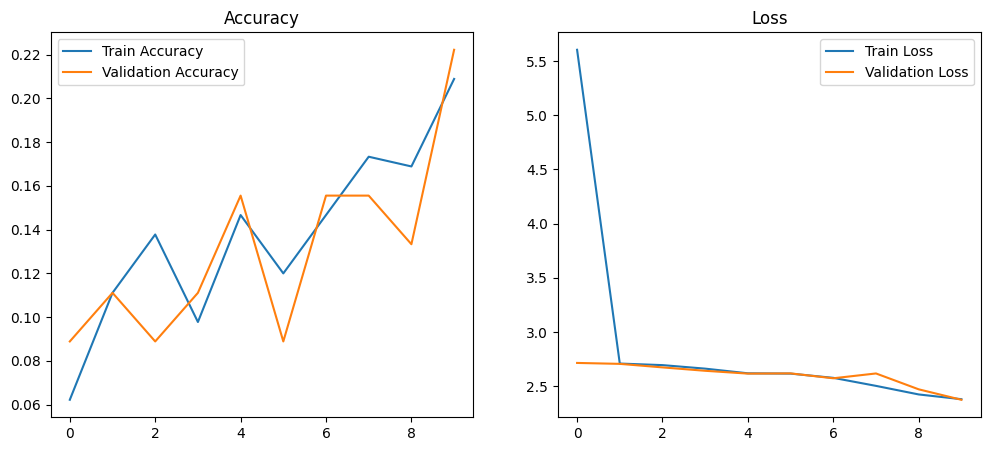

In [ ]:
# Step 6: Plot Training History
import matplotlib.pyplot as plt

# Plot training accuracy & loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

In [ ]:
# Step 7: Evaluate the Model on Test Data
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(test_data_dir):
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(test_generator)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Test Loss: {loss:.4f}")

    # Make predictions
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)

    # Get true classes
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Print classification report
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

    # Print confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    print("Confusion Matrix:")
    print(cm)

# Example test data directory
test_data_directory = '/content/drive/MyDrive/Crop_Disease_Detection_Project/Dataset/Test'
evaluate_model(test_data_directory)

Found 180 images belonging to 15 classes.
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.3169 - loss: 2.1890
Test Accuracy: 30.00%
Test Loss: 2.1461
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step
                            precision    recall  f1-score   support

Pepper bell bacterial spot       0.32      0.67      0.43        12
       Pepper bell healthy       0.00      0.00      0.00        12
       Potato early blight       0.50      0.83      0.62        12
            Potato healthy       1.00      0.08      0.15        12
        Potato late blight       0.00      0.00      0.00        12
     Tomato bacterial spot       0.00      0.00      0.00        12
       Tomato early blight       0.00      0.00      0.00        12
            Tomato healthy       0.45      0.75      0.56        12
        Tomato late blight       0.00      0.00      0.00        12
               Tomato leaf       0.00      0.00      0.00        12
              Tomato mosai       0.23      0.83      0.36

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Step 8: Making Predictions on New Images
def prepare_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))  # Resize to match model input
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale pixel values
    return img_array

# Prevention tips dictionary
prevention_tips = {
    'Pepper bell bacterial spot': "Use resistant varieties, rotate crops, remove infected debris, and avoid overhead irrigation.",
    'Pepper bell healthy': "Maintain proper plant care, pest management, and soil health.",
    'Potato early blight': "Rotate crops, use resistant varieties, and apply fungicides early.",
    'Potato healthy': "Ensure proper watering, soil nutrition, and pest control.",
    'Potato late blight': "Use resistant varieties, apply fungicides during wet conditions, and practice crop rotation.",
    'Tomato bacterial spot': "Use resistant varieties, avoid overhead irrigation, and apply copper-based bactericides.",
    'Tomato early blight': "Use resistant varieties, apply fungicides, and rotate crops.",
    'Tomato healthy': "Practice good plant care, pest management, and regular monitoring.",
    'Tomato late blight': "Apply fungicides during wet weather, use resistant varieties, and remove infected plants.",
    'Tomato leaf': "Maintain proper spacing, remove infected leaves, and apply fungicides.",
    'Toamto mosai': "Use virus-free seeds, practice sanitation, and remove infected plants.",
    'Tomato septoria': "Use resistant varieties, remove infected leaves, and apply fungicides.",
    'Tomato spider': "Use predatory mites, insecticidal soaps, and avoid broad-spectrum insecticides.",
    'Tomato target': "Use resistant varieties, remove infected debris, and apply fungicides.",
    'Tomato yellow': "Control whiteflies, use resistant varieties, and remove infected plants.",

}

# Example of predicting a single image
test_image_path = '/content/drive/MyDrive/Crop_Disease_Detection_Project/Dataset/Test/Pepper bell bacterial spot/4aa16bda-c8f4-40b1-9f68-16bc936e6e9e___JR_B.Spot 3157.JPG'  # Change this to your test image path
prepared_image = prepare_image(test_image_path)

# Make prediction
predictions = model.predict(prepared_image)
predicted_class_index = np.argmax(predictions[0])
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index]

print(f"Predicted class for {os.path.basename(test_image_path)}: {predicted_class}")
print(prevention_tips.get(predicted_class, "No prevention tips available for this class."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted class for 4aa16bda-c8f4-40b1-9f68-16bc936e6e9e___JR_B.Spot 3157.JPG: Pepper bell bacterial spot
Use resistant varieties, rotate crops, remove infected debris, and avoid overhead irrigation.
